In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import CM4Xutils

In [3]:
local_path_to_budgets_zarr = "../../../codedev/CM4Xutils/data/coarsened/CM4Xp25_budgets_sigma2_2000-2004.zarr"
ds_sig2 = xr.open_zarr(local_path_to_budgets_zarr).fillna(0.).sel(exp="forced").isel(time=[0], time_bounds=[0,1])

ds = xr.open_dataset("../data/CM4Xp125_thickness_and_density_slice.nc")
ds = ds.assign_coords({"sigma2_l":ds_sig2.sigma2_l, "sigma2_i":ds_sig2.sigma2_i})

In [4]:
grid_xgcm = CM4Xutils.ds_to_grid(ds.copy(), Zprefix="z_")
grid_xhis = CM4Xutils.ds_to_grid(ds.copy(), Zprefix="z_")

In [20]:
sig2_levels = [0, 34, 35, 36, 36.5, 36.75, 36.9, 37, 50]

ds_trans = xr.Dataset()
ds_trans["thkcello"] = grid_xgcm.transform(
    ds.thkcello.fillna(0.),
    "Z",
    xr.DataArray(np.array(sig2_levels), dims=("sig2_l",)),
    target_data=CM4Xutils.fillna_below(grid_xgcm, ds.sigma2),
    method="conservative"
)
ds_trans = ds_trans.assign_coords({"sig2_i":xr.DataArray(sig2_levels, dims=("sig2_i",))})
ds_trans = ds_trans.assign_coords(ds.coords)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:464: UserWarning: The `target data` input is not located on the cell bounds. This method will continue with linear interpolation with repeated boundary values. For most accurate results provide values on cell bounds.
  warnings.warn(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


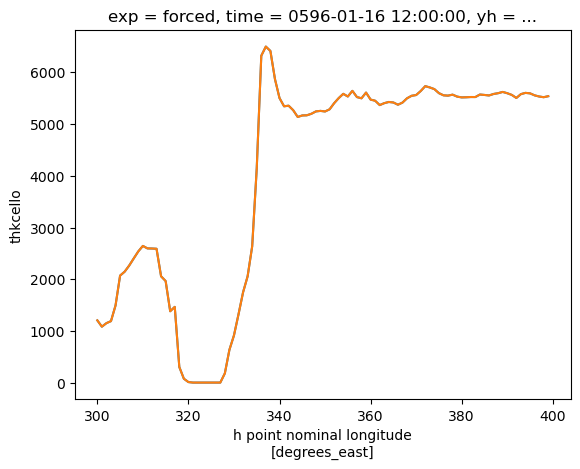

In [21]:
ds_slice=ds.isel(yh=720, xh=slice(300, 400), xq=slice(300, 401))
ds_slice["thkcello"].sum("z_l").plot()

ds_trans_slice=ds_trans.isel(yh=720, xh=slice(300, 400), xq=slice(300, 401))
ds_trans_slice["thkcello"].sum("sig2_l").plot()

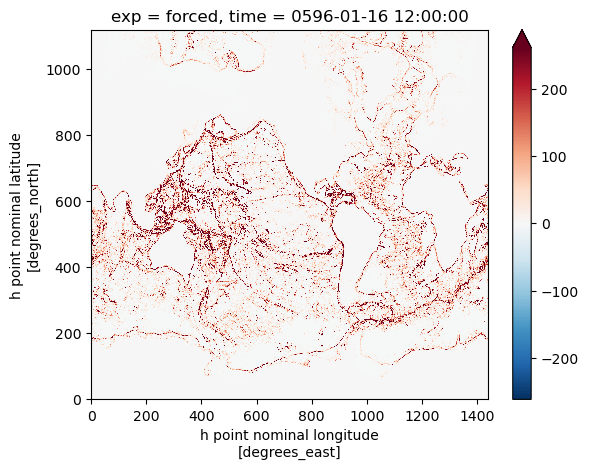

In [26]:
(ds["thkcello"].sum("z_l") - ds.deptho).plot(robust=True)

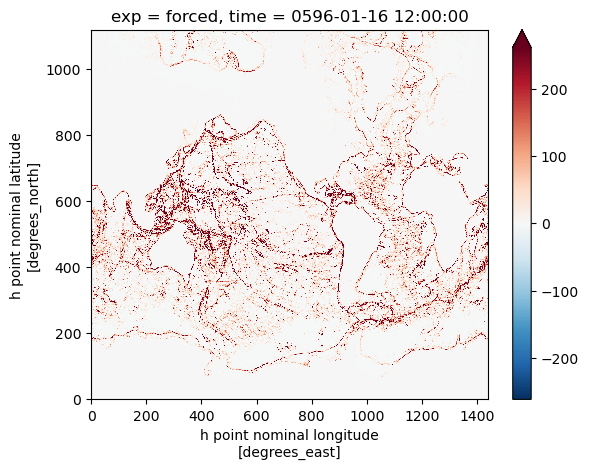

In [27]:
(ds_trans["thkcello"].sum("sig2_l") - ds_trans.deptho).plot(robust=True)

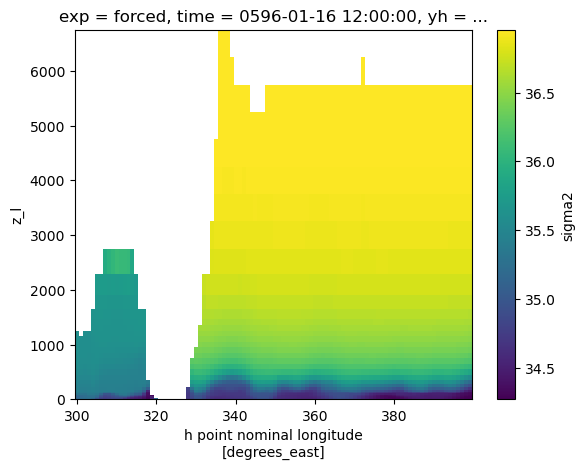

In [8]:
ds_slice.sigma2.plot()

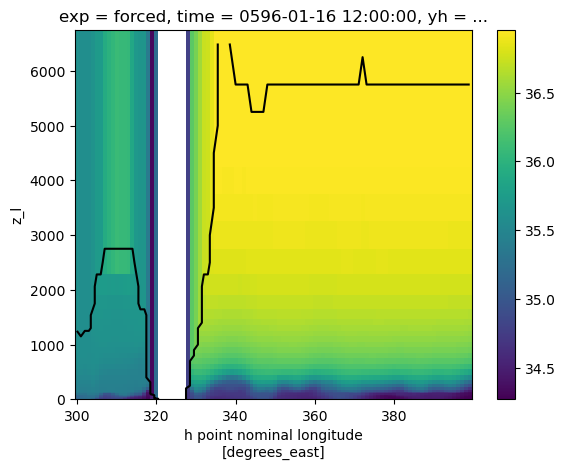

In [10]:
CM4Xutils.fillna_below(grid_xgcm, ds.sigma2.fillna(0.)).isel(yh=720, xh=slice(300, 400)).plot()
np.isnan(ds.sigma2).isel(yh=720, xh=slice(300, 400)).plot.contour(levels=[0.5], colors="k")

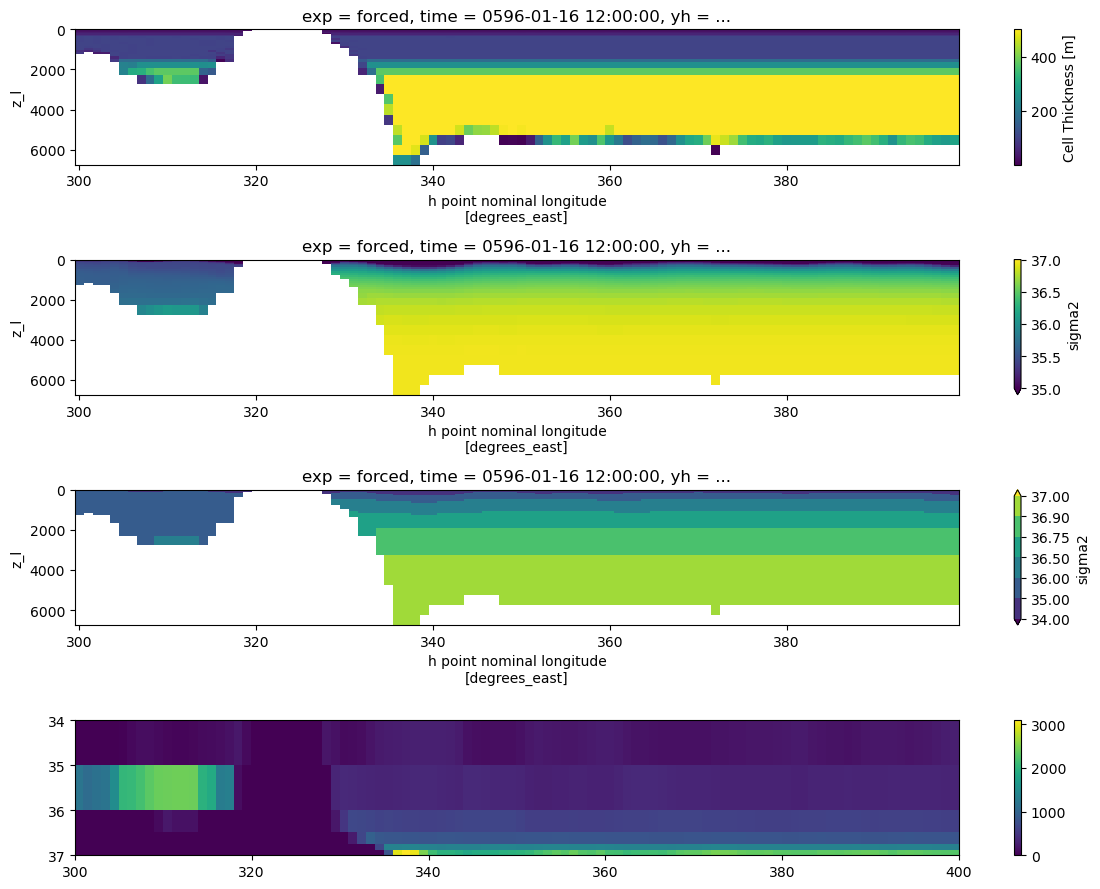

In [11]:
plt.figure(figsize=(12,9))
plt.subplot(4,1,1)
grid_xgcm._ds.thkcello.isel(yh=720, xh=slice(300, 400)).plot(yincrease=False)
plt.subplot(4,1,2)
grid_xgcm._ds.sigma2.isel(yh=720, xh=slice(300, 400)).plot(yincrease=False, vmin=35, vmax=37)
plt.subplot(4,1,3)
grid_xgcm._ds.sigma2.isel(yh=720, xh=slice(300, 400)).plot(yincrease=False, levels=sig2_levels, extend="both")
plt.subplot(4,1,4)
ds_trans_slice = ds_trans.isel(yh=720, xh=slice(300, 400), xq=slice(300, 401))
plt.pcolor(
    ds_trans_slice.xq,
    ds_trans_slice.sig2_i,
    ds_trans_slice.thkcello.transpose()
)
plt.colorbar()
plt.ylim(37, 34)
plt.tight_layout()

### Testing at native resolution

In [28]:
ds = xr.open_zarr("/collab1/data_untrusted/Henri.Drake/CM4X/native_resolution/CM4Xp125_native_resolution_example_2010.zarr")

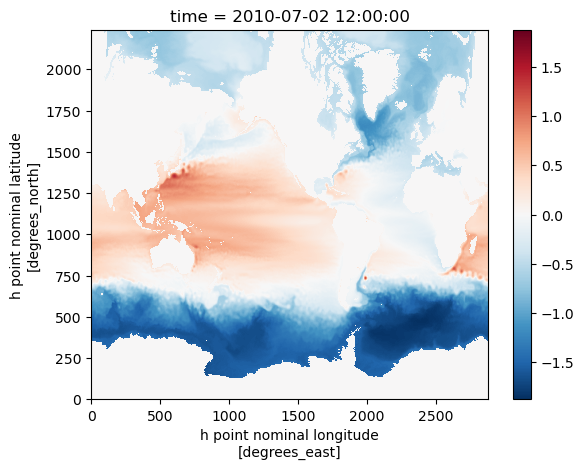

In [30]:
(ds.thkcello.sum("zl") - ds.deptho).plot()